# Ge'ez Chatbot Development

In [ ]:
!pip install fuzzywuzzy[speedup]
import pandas as pd
import regex as re
from fuzzywuzzy import fuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.2 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [ ]:
import unicodedata

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from transformers import AutoModel, AutoTokenizer

In [ ]:
# Set display options for Ge'ez script
pd.set_option('display.max_colwidth', None)
#import openpyxl

In [ ]:
import logging

In [ ]:
import numpy as np
from datetime import datetime

In [ ]:
import json
from datetime import datetime
import random

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!cp "/content/drive/MyDrive/Intelligent_geez_chatbot/Kufale.json" "/content/Kufale.json"
!cp "/content/drive/MyDrive/ግዕዝ_ጥያቄ_ወአውስኦ.csv" "/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv"
#!cp "/content/drive/MyDrive/Intelligent_geez_chatbot/geez_tigrigna.csv" "/content/geez_tigrigna.csv"

In [ ]:
import json
import pandas as pd
from pprint import pprint
# Load the Q&A dataset
qa_data = pd.read_csv('/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv', encoding='utf-8')
# Examine the datasets
print("\nQ&A Data Sample:")
print(qa_data.tail(10))


Q&A Data Sample:
                                  ጥያቄ                                   አውስኦ
331                   ምንተ ጠባሕክሙ በበዐል?             ንሕነሰ ኢጠባሕነ አላ ቀነይነ ስጋ ላሕም።
332                      መኑ ሰመየከ ስምከ?                         አቡየ ውእቱ ዘሰመየኒ።
333                      መኑ ውእቱ ፈጣሪከ?  ፈጣሪየ ወፈጣሬ ኩሉ ዓለምሰ አጋእዝተ ዓለም ስላሴ ውእቶሙ።
334                መኑ ይሰመይ ብእሴሃ ልሔዋን?                              አዳም ይሰመይ።
335          እስፍንት አኃት ሀለዋክን እምየ ኪሮስ?                        ኢሀለዋኒ አሃት ወልድየ።
336                   ረከብከኑ ለሐጎስ እኁከ?                              እወ ረከብክዎ።
337                   አቡየ ሀለወትከ ለፋፊት?            ኢሀለወትኒ ወልድየ እመ ክህልከ ቅንይ ሊተ።
338  አሐቲ ተስዕሎት ሀለወትኒ እሁየ ፈቃድከኑ እስእለከ?                         ሰአለኢ ፈቃድየ ውእቱ።
339                      መኑ ውእቱ ዓርክኪ?                         እገሊት ይእቲ ዓርክየ።
340                     ምንት ውእቱ ግብርኪ?         ሰባኪተ ወንጌል ወመተርጉመ ግዕዝ ውእቱ ግብርየ።


In [ ]:
import re
import json
import pandas as pd

# ========== 1. Define your custom Geez stopwords ==========

custom_geez_stopwords = set("""
እስመ ውስተ አምጣነ አኮኑ እመ አመ በ ለ ከመ ጊዜ እንበለ ዘ እንተ እለ ለለ ከመከመ ሀበሀበ
በበ እንዘ ዘዘ ሀበ መንገለ ወእደ ህየንተ በይነ እንበይነ ፍዳ መጠነ ዐቅመ በቀለ አምሳለ
ጽላሎተ መዋዕለ አያተ እንዘእንዘ ወ
""".split())

# ========== 2. Define preprocessing function ==========

def preprocess_geez_text(text):
    if not isinstance(text, str):
        return ""

    # Remove Geez numerals (if needed) and punctuation
    text = re.sub(r'[\u1369-\u137C]', '', text)  # Remove Geez numerals
    text = re.sub(r'[።፣፤፥፦]', ' ', text)  # Remove Geez punctuation marks
    text = re.sub(r'[^\w\s]', '', text)  # Remove any other punctuation marks

    # Tokenize the text into words (using spaces as the delimiter)
    tokens = text.split()

    # Remove stopwords based on the custom list (ensure no extra spaces in the list)
    cleaned_tokens = [word for word in tokens if word.strip() not in custom_geez_stopwords]

    # Join the cleaned tokens back into a single string and return
    return ' '.join(cleaned_tokens)

def preprocess_english_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower().strip()


# ========== 4. Load and process ግዕዝ_ጥያቄ_ወአውስኦ.csv ==========

qa_df = pd.read_csv('/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv', encoding='utf-8')

# Apply the preprocessing function to the question and answer columns
qa_df['question_processed'] = qa_df['ጥያቄ'].apply(preprocess_geez_text)
qa_df['answer_processed'] = qa_df['አውስኦ'].apply(preprocess_geez_text)

# ========== 5. Optional: Show results ==========
print(qa_df[['ጥያቄ', 'question_processed']].head())
print(qa_df[['አውስኦ', 'answer_processed']].head())


             ጥያቄ question_processed
0       እፎ ሀደርከ?            እፎ ሀደርከ
1       እፎ ወዓልከ?            እፎ ወዓልከ
2    ሰላም ለከ እሁየ?         ሰላም ለከ እሁየ
3  ኦ ኡሁየ መኑ ስምከ?       ኦ ኡሁየ መኑ ስምከ
4     ማዕዜ ተወለድከ?          ማዕዜ ተወለድከ
                                        አውስኦ  \
0  እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።   
1  እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።   
2  እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።   
3                            ስምየ ሰሎሞን ይትበሃል።   
4                ዘተወለድኩ በ፲፱፻፺፫ ዓመተ ምህረት ውእቱ።   

                       answer_processed  
0  እግዚኣብሔር ይሴባህ እንቃዕ በሰላም መጻእከ ልሳንነ ግዕዝ  
1  እግዚኣብሔር ይሴባህ እንቃዕ በሰላም መጻእከ ልሳንነ ግዕዝ  
2  እግዚኣብሔር ይሴባህ እንቃዕ በሰላም መጻእከ ልሳንነ ግዕዝ  
3                        ስምየ ሰሎሞን ይትበሃል  
4                   ዘተወለድኩ ዓመተ ምህረት ውእቱ  


In [ ]:
!pip install nltk>=3.9

In [ ]:
import pandas as pd
import json
import re
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter

# Download necessary NLTK data
# Download punkt properly
nltk.download('punkt')
# If you also use stopwords, add this
nltk.download('stopwords')
# Download the punkt_tab resource which seems to be missing
nltk.download('punkt_tab')


def clean_geez_text(text):
    """Specialized cleaner for Ge'ez text"""
    if not isinstance(text, str):
        return ''

    # Ge'ez-specific cleaning
    text = text.strip()
    text = re.sub(r'[\u1369-\u137C]', '', text)  # Remove Ethiopic numbers
    text = re.sub(r'[^\w\s\u1200-\u137F]', '', text)  # Keep only Ge'ez chars and whitespace
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text

def preprocess_qa_data(csv_path):
    """Process the Q&A dataset"""
    qa_df = pd.read_csv(csv_path, encoding='utf-8')

    # Validate columns
    required_columns = {'ጥያቄ', 'አውስኦ'}
    if not required_columns.issubset(qa_df.columns):
        raise ValueError(f"CSV must contain {required_columns} columns")

    # Clean and tokenize
    qa_df['question_cleaned'] = qa_df['ጥያቄ'].apply(clean_geez_text)
    qa_df['answer_cleaned'] = qa_df['አውስኦ'].apply(clean_geez_text)

    # Apply NLTK word_tokenize ( Punkt tokenizer)
    qa_df['question_tokens'] = qa_df['question_cleaned'].apply(word_tokenize)
    qa_df['answer_tokens'] = qa_df['answer_cleaned'].apply(word_tokenize)

    # Add length features
    qa_df['question_length'] = qa_df['question_tokens'].apply(len)
    qa_df['answer_length'] = qa_df['answer_tokens'].apply(len)

    return qa_df


def analyze_dataset(df, name, text_col, token_col):
    """Generate insights about the dataset"""
    print(f"\n{name} Dataset Analysis:")
    print(f"Total entries: {len(df)}")

    # Token statistics
    all_tokens = [token for sublist in df[token_col] for token in sublist]
    vocab = Counter(all_tokens)

    print(f"Unique tokens: {len(vocab)}")
    print(f"Most common tokens: {vocab.most_common(10)}")
    print(f"Average length: {sum(len(x) for x in df[token_col])/len(df):.1f} tokens")
    print(f"Sample cleaned text: {df[text_col].iloc[0][:50]}...")


# Process Q&A data
qa_df = preprocess_qa_data('/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv')
analyze_dataset(qa_df, "ጥያቄ ወ ኣውስኦ", "question_cleaned", "question_tokens")

# Save processed data
qa_df.to_csv('processed_qa.csv', index=False, encoding='utf-8')
print("\nPreprocessing complete. Data saved for model training.")


ጥያቄ ወ ኣውስኦ Dataset Analysis:
Total entries: 341
Unique tokens: 789
Most common tokens: [('ውእቱ', 41), ('ምንት', 40), ('ምንተ', 29), ('መኑ', 28), ('አይቴ', 19), ('ትምህርት', 17), ('እፎ', 16), ('ግእዝ', 15), ('ትምህርተ', 13), ('ክርስቶስ', 12)]
Average length: 3.8 tokens
Sample cleaned text: እፎ ሀደርከ...

Preprocessing complete. Data saved for model training.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
import pandas as pd
import json
import re
from collections import Counter
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize

# ================================
# Safe Tokenizer
# ================================
def tokenize_column(text):
    if isinstance(text, str):
        return text.strip().split()  # Or use word_tokenize(text)
    else:
        return []

# ================================
# Preprocessing Functions
# ================================

def preprocess_qa_data(path):
    df = pd.read_csv(path)
    df = df.dropna(subset=['ጥያቄ', 'አውስኦ'])
    df['question_tokens'] = df['ጥያቄ'].apply(tokenize_column)
    df['answer_tokens'] = df['አውስኦ'].apply(tokenize_column)
    return df

# ================================
# Text Preprocessor Class
# ================================
class TextPreprocessor:
    def __init__(self):
        self.vocab = {}
        self.token_to_idx = {}
        self.idx_to_token = {}
        self.special_tokens = ['<pad>', '<unk>', '<sos>', '<eos>']
        self.pad_idx = 0
        self.unk_idx = 1
        self.sos_idx = 2
        self.eos_idx = 3
        self.max_length = 50

    def build_vocab(self, tokens_list, min_freq=2):
        all_tokens = [token for sublist in tokens_list for token in sublist]
        counter = Counter(all_tokens)
        self.vocab = {token: idx for idx, token in enumerate(self.special_tokens)}
        idx = len(self.special_tokens)
        for token, count in counter.items():
            if count >= min_freq:
                self.vocab[token] = idx
                idx += 1
        self.token_to_idx = self.vocab
        self.idx_to_token = {idx: token for token, idx in self.vocab.items()}

    def numericalize(self, tokens):
        return [self.token_to_idx.get(token, self.unk_idx) for token in tokens]

    def pad_sequence(self, indices):
        if len(indices) >= self.max_length:
            return indices[:self.max_length - 1] + [self.eos_idx]
        else:
            return indices + [self.eos_idx] + [self.pad_idx] * (self.max_length - len(indices) - 1)

# ================================
# Custom Dataset
# ================================
class GeezDataset(Dataset):
    def __init__(self, df, text_col, target_col, preprocessor):
        self.df = df
        self.text_col = text_col
        self.target_col = target_col
        self.preprocessor = preprocessor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.preprocessor.pad_sequence(
            self.preprocessor.numericalize(
                self.df.iloc[idx][self.text_col]
            )
        )
        target = self.preprocessor.pad_sequence(
            self.preprocessor.numericalize(
                self.df.iloc[idx][self.target_col]
            )
        )
        return torch.LongTensor(text), torch.LongTensor(target)

# ================================
# Complete Preprocessing Pipeline
# ================================
def complete_preprocessing_pipeline():
    preprocessor = TextPreprocessor()

    qa_df = preprocess_qa_data('/content/processed_qa.csv')
    all_tokens = (
        qa_df['question_tokens'].tolist() +
        qa_df['answer_tokens'].tolist()
    )

    preprocessor.build_vocab(all_tokens)

    with open('vocab.json', 'w', encoding='utf-8') as f:
        json.dump(preprocessor.vocab, f, ensure_ascii=False)

    train_df, val_df = train_test_split( qa_df, test_size=0.2)

    train_dataset = GeezDataset(train_df, 'gez_tokens', 'eng_tokens', preprocessor)
    val_dataset = GeezDataset(val_df, 'gez_tokens', 'eng_tokens', preprocessor)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader, preprocessor

# ================================
# Run It
# ================================
train_loader, val_loader, preprocessor = complete_preprocessing_pipeline()
print("\n✅ Data is now completely ready for training!")



✅ Data is now completely ready for training!


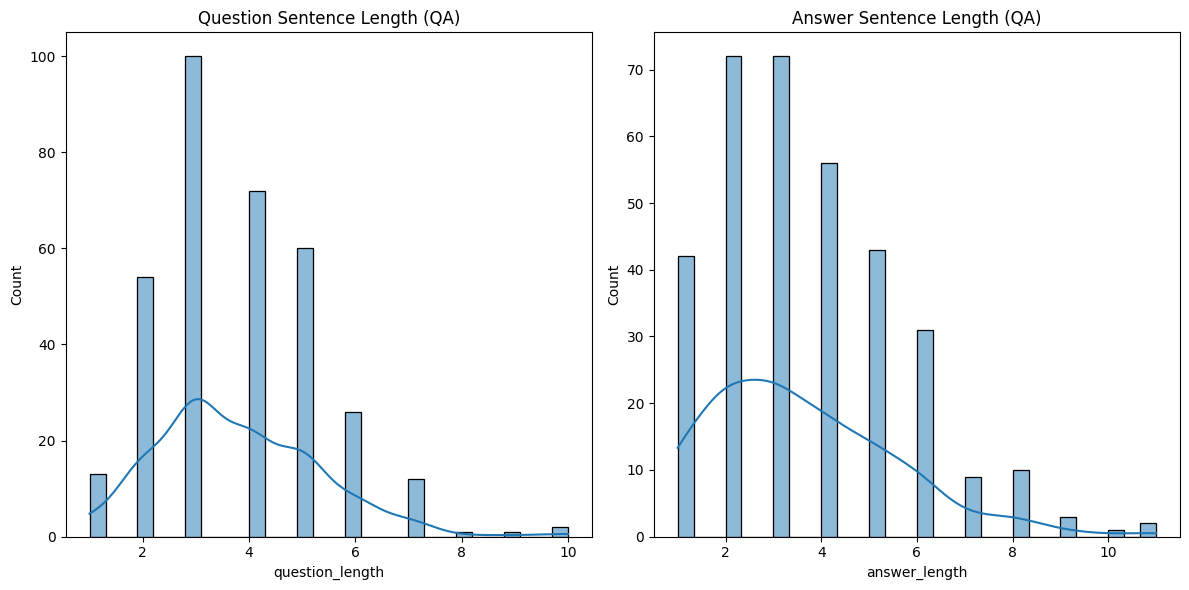

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import pandas as pd
import re

# ===== Load Datasets =====
qa_df = pd.read_csv('/content/processed_qa.csv')

# ====== Text Cleaning ======
def clean_geez_text(text):
    """Clean Ge'ez script text."""
    if not isinstance(text, str):
        return ''
    text = text.strip()
    text = re.sub(r'[\u1369-\u137C]', '', text)  # Remove Ethiopic numerals
    text = re.sub(r'[^\w\s\u1200-\u137F]', '', text)  # Keep only Ge'ez range and spaces
    text = re.sub(r'\s+', ' ', text)
    return text

# ====== General Tokenizer ======
def tokenize_column(text):
    """Tokenizes cleaned text using NLTK word_tokenize."""
    return word_tokenize(clean_geez_text(text))

# ====== Preprocess QA Dataset ======
if 'ጥያቄ' in qa_df.columns and 'አውስኦ' in qa_df.columns:
    qa_df['question_cleaned'] = qa_df['ጥያቄ'].apply(clean_geez_text)
    qa_df['answer_cleaned'] = qa_df['አውስኦ'].apply(clean_geez_text)

    qa_df['question_tokens'] = qa_df['question_cleaned'].apply(word_tokenize)
    qa_df['answer_tokens'] = qa_df['answer_cleaned'].apply(word_tokenize)

    qa_df['question_length'] = qa_df['question_tokens'].apply(len)
    qa_df['answer_length'] = qa_df['answer_tokens'].apply(len)
else:
    print("Q&A DataFrame missing 'ጥያቄ' or 'አውስኦ' columns.")

# --- Q&A Data ---
if all(col in qa_df.columns for col in ['question_length', 'answer_length']):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(qa_df['question_length'], bins=30, kde=True)
    plt.title('Question Sentence Length (QA)')

    plt.subplot(1, 2, 2)
    sns.histplot(qa_df['answer_length'], bins=30, kde=True)
    plt.title('Answer Sentence Length (QA)')
    plt.tight_layout()
    plt.show()
else:
    print("Q&A sentence length columns missing.")



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load processed data

qa_df = pd.read_csv('/content/processed_qa.csv')
# Standardize column names and add task labels


qa_df = qa_df[['question_cleaned', 'answer_cleaned']].rename(columns={
    'question_cleaned': 'input_text', 'answer_cleaned': 'target_text'
})
qa_df['task'] = 'geez qa'


# Prefix task to input text
for df in [ qa_df]:
    df['input_text'] = df['task'] + ': ' + df['input_text']

# Combine datasets
combined_df = qa_df
print(f"Combined dataset has {len(combined_df)} samples.")

# Keep task column for stratification, but drop it after split
combined_df_for_split = combined_df[['input_text', 'target_text', 'task']]

# First split: Train (80%) and temp (20%)
train_df, temp_df = train_test_split(
    combined_df_for_split,
    test_size=0.3,
    stratify=combined_df_for_split['task'],
    random_state=42
)

# Second split: Validation (10%) and Test (10%) from temp
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['task'],
    random_state=42
)

# Drop 'task' column before saving
train_df = train_df[['input_text', 'target_text']]
val_df = val_df[['input_text', 'target_text']]
test_df = test_df[['input_text', 'target_text']]

# Save to CSV
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

print(f"Train set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Test set: {len(test_df)} samples")


Combined dataset has 341 samples.
Train set: 238 samples
Validation set: 51 samples
Test set: 52 samples


In [ ]:
from transformers import MT5Tokenizer

tokenizer = MT5Tokenizer.from_pretrained('google/mt5-small')

MAX_LEN = 128

def tokenize_function(example):
    input_encodings = tokenizer(
        example['input_text'], max_length=MAX_LEN, padding='max_length', truncation=True
    )
    target_encodings = tokenizer(
        example['target_text'], max_length=MAX_LEN, padding='max_length', truncation=True
    )
    input_encodings['labels'] = target_encodings['input_ids']
    return input_encodings


tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'MT5Tokenizer'.
You are using the default legacy behaviour of the <class 'transformers.models.mt5.tokenization_mt5.MT5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
from torch.utils.data import Dataset
import torch

# --- Modified Dataset Class ---
class GeezText2TextDataset(Dataset):
    def __init__(self, dataframe, device):
        self.data = dataframe
        self.device = device # Store the target device

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        model_inputs = tokenize_function(row)
        # Move tensors to the specified device
        return {k: torch.tensor(v).to(self.device) for k, v in model_inputs.items()}
# --- End Modified Dataset Class ---


In [ ]:
# train_dataset = GeezText2TextDataset(train_df)
# val_dataset = GeezText2TextDataset(val_df)
# test_dataset= GeezText2TextDataset(test_df)

In [ ]:
# Install evaluate and peft
!pip install evaluate peft # bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# Install dependencies with explicit bitsandbytes reinstall
!pip uninstall -y bitsandbytes
!pip install -U bitsandbytes sacrebleu rouge-score evaluate peft


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.7 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=45e42cafc86e5004eb2998dedef01208b91768e9ad585dc76229becd46ee8116
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from transformers import (
    Seq2SeqTrainer, Seq2SeqTrainingArguments,
    DataCollatorForSeq2Seq, EarlyStoppingCallback,
    AutoModelForSeq2SeqLM, AutoTokenizer,
    BitsAndBytesConfig, pipeline
)
from datasets import Dataset
from evaluate import load
from peft import LoraConfig, get_peft_model, TaskType
import numpy as np
import pandas as pd
import shutil
import warnings
import os
import unicodedata
import torch # Import torch

warnings.filterwarnings("ignore", category=UserWarning)

# Configuration
MODEL_NAME = "google/mt5-small"
MAX_LENGTH = 128
BATCH_SIZE = 1
GRAD_ACCUM_STEPS = 8
NUM_EPOCHS = 3
LEARNING_RATE = 2e-5
WARMUP_STEPS = 150

# Clean directories
for dir_path in ["./geez-mt5-finetuned", "./geez-mt5-final", "./logs"]:
    if os.path.exists(dir_path):
        try:
            shutil.rmtree(dir_path)
            print(f"Cleaned {dir_path}")
        except Exception as e:
            print(f"Cleanup error: {e}")

def normalize_text(text):
    """Normalize Ge'ez text by removing diacritics and standardizing."""
    if not isinstance(text, str): # Add check for non-string input
        return ''
    text = unicodedata.normalize("NFKD", text)
    return text.strip()

def load_data_safely():
    try:
        qa_df = pd.read_csv("/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv", encoding='utf-8')
        # Clean and validate data
        qa_df = qa_df.dropna(subset=["ጥያቄ", "አውስኦ"])
        # Apply normalize_text safely, converting to string first
        qa_df["ጥያቄ"] = qa_df["ጥያቄ"].astype(str).apply(normalize_text)
        qa_df["አውስኦ"] = qa_df["አውስኦ"].astype(str).apply(normalize_text)
        qa_df = qa_df[qa_df["ጥያቄ"].str.len() > 0]
        qa_df = qa_df[qa_df["አውስኦ"].str.len() > 0]

        # Print sample data and statistics
        print("Sample QA pairs:")
        for i, (q, a) in enumerate(zip(qa_df["ጥያቄ"][:5], qa_df["አውስኦ"][:5])):
            print(f"Sample {i+2}: Q: {q}, A: {a}")
        print(f"Loaded {len(qa_df)} QA samples.")
        print(f"Unique questions: {len(qa_df['ጥያቄ'].unique())}")

        if len(qa_df) == 0:
            print("Error: No valid QA samples after cleaning.")
            return None, None

        qa_data = [{"source": q, "target": a} for q, a in zip(qa_df["ጥያቄ"], qa_df["አውስኦ"])]
        return qa_data, qa_df
    except FileNotFoundError:
        print("Error: /content/ግዕዝ_ጥያቄ_ወአውስኦ.csv not found.")
        return None, None
    except Exception as e:
        print(f"Error loading QA data: {e}")
        return None, None

# Load model with 4-bit quantization or fallback to FP16
try:
    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_compute_dtype=torch.float16,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_use_double_quant=True
    )
    model = AutoModelForSeq2SeqLM.from_pretrained(
        MODEL_NAME,
        quantization_config=quantization_config,
        device_map="auto"
    )
    print("Loaded model with 4-bit quantization")
except Exception as e:
    print(f"QLoRA failed: {e}. Falling back to FP16")
    model = AutoModelForSeq2SeqLM.from_pretrained(
        MODEL_NAME,
        torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
        device_map="auto"
    )

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, legacy=False)
new_tokens = ["፩", "፪", "፫", "፬", "፭", "፮", "፯", "፰", "፱", "፲", "፳", "፴", "፵", "፶", "፷", "፸", "፹", "፺", "፻", "፼"]
tokenizer.add_tokens(new_tokens)
model.resize_token_embeddings(len(tokenizer))

# Configure LoRA
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=256,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["q", "k", "v", "o", "wi", "wo"],
    bias="none"
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

def preprocess_function(examples):
    inputs = [f"Question: {x} Answer:" for x in examples["source"]]
    targets = [x for x in examples["target"]]

    model_inputs = tokenizer(
        inputs, max_length=MAX_LENGTH, truncation=True, padding="max_length"
    )
    labels = tokenizer(
        text_target=targets, max_length=MAX_LENGTH,
        truncation=True, padding="max_length"
    )["input_ids"]

    labels = [[l if l != tokenizer.pad_token_id else -100 for l in label] for label in labels]

    # Debug tokenization (optional, can remove during actual training)
    # print("Sample tokenized input:", tokenizer.decode(model_inputs["input_ids"][0], skip_special_tokens=True))
    # print("Sample tokenized label:", tokenizer.decode([l for l in labels[0] if l != -100], skip_special_tokens=True))
    # print("Sample label token IDs:", labels[0])


    return {
        "input_ids": model_inputs["input_ids"],
        "attention_mask": model_inputs["attention_mask"],
        "labels": labels
    }

# Load and preprocess data
combined_data, qa_df = load_data_safely()
if combined_data is None:
    raise ValueError("Failed to load data")
dataset = Dataset.from_list(combined_data).train_test_split(test_size=0.1)
tokenized_data = dataset.map(preprocess_function, batched=True, batch_size=512)

# Corrected Seq2SeqTrainingArguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./geez-mt5-finetuned",
    eval_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps=50,
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    gradient_accumulation_steps=GRAD_ACCUM_STEPS,
    num_train_epochs=NUM_EPOCHS,
    warmup_steps=WARMUP_STEPS,
    predict_with_generate=True,
    generation_max_length=MAX_LENGTH,
    # Removed generation_num_beams and generation_no_repeat_ngram_size
    fp16=torch.cuda.is_available(),
    logging_dir="./logs",
    logging_steps=10,
    logging_first_step=True,
    report_to="tensorboard",
    load_best_model_at_end=True,
    metric_for_best_model="bleu",
    greater_is_better=True,
    save_total_limit=2,
    optim="adamw_torch",
)

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    # Ensure labels are converted back from -100 for decoding
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Debug raw token IDs and decoded outputs (optional, can remove during actual training)
    # print("Sample prediction token IDs:", preds[:3])
    # print("Sample label token IDs:", labels[:3])
    # print("Sample predictions and labels:")
    # for i, (pred, label) in enumerate(zip(decoded_preds[:3], decoded_labels[:3])):
    #     print(f"Sample {i+1}: Pred: {pred}, Label: {label}")

    # --- Corrected filtering ---
    # Filter predictions and labels pairwise
    filtered_preds = []
    filtered_labels = []
    # Define tokens to consider as "invalid" for prediction filtering
    invalid_tokens = {"<extra_id_0>", "<extra_id_1>", "<pad>", "</s>"}

    for pred, label in zip(decoded_preds, decoded_labels):
        pred_stripped = pred.strip()
        label_stripped = label.strip()

        # Only include the pair if the prediction is non-empty and not an invalid token
        # We generally want to include the label if the prediction is valid,
        # even if the label itself might be empty after stripping (though ideally not in the dataset)
        if pred_stripped and pred_stripped not in invalid_tokens:
             # Optionally, you could add a check for label_stripped as well if needed:
             # if label_stripped:
            filtered_preds.append(pred_stripped)
            filtered_labels.append(label_stripped) # Keep the corresponding label

    decoded_preds = filtered_preds
    decoded_labels = filtered_labels
    # --- End corrected filtering ---


    if not decoded_preds or not decoded_labels:
        print("Warning: Empty predictions or labels after filtering")
        # Return metrics of 0 if no valid pairs remain
        return {"bleu": 0.0, "rouge1": 0.0, "rouge2": 0.0, "rougeL": 0.0}


    # Ensure lengths match after pairwise filtering
    if len(decoded_preds) != len(decoded_labels):
         print(f"Error: Length mismatch after filtering - predictions: {len(decoded_preds)}, labels: {len(decoded_labels)}")
         # Handle the mismatch - either raise an error or return zero metrics
         return {"bleu": 0.0, "rouge1": 0.0, "rouge2": 0.0, "rougeL": 0.0}


    bleu = load("sacrebleu").compute(
        predictions=decoded_preds,
        references=[[x] for x in decoded_labels],
        lowercase=False # Keep case sensitive if needed for Ge'ez
    )["score"]
    rouge = load("rouge").compute(
        predictions=decoded_preds,
        references=decoded_labels,
        use_stemmer=True # Use stemmer if appropriate for the language
    )
    return {
        "bleu": bleu,
        "rouge1": rouge["rouge1"] * 100,
        "rouge2": rouge["rouge2"] * 100,
        "rougeL": rouge["rougeL"] * 100
    }

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    data_collator=DataCollatorForSeq2Seq(tokenizer, model=model),
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

print("\nStarting training...")
trainer.train()

# Save model and tokenizer
trainer.model.save_pretrained("./geez-mt5-final")
tokenizer.save_pretrained("./geez-mt5-final")
print("Training complete!")

# Ge'ez Chatbot Implementation
def geez_chatbot(question, qa_df, model, tokenizer):
    question = normalize_text(str(question).strip())

    # Rule-based: Check for exact match
    match = qa_df[qa_df["ጥያቄ"].str.strip() == question]
    if not match.empty:
        return match["አውስኦ"].iloc[0]

    # Generative: Use fine-tuned model
    input_text = f"Question: {question} Answer:"
    inputs = tokenizer(input_text, max_length=MAX_LENGTH, truncation=True, padding="max_length", return_tensors="pt")
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Apply generation parameters during inference
    outputs = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=MAX_LENGTH,
        num_beams=5,
        bad_words_ids=[[tokenizer.convert_tokens_to_ids(t) for t in ["<extra_id_0>", "<extra_id_1>", "<pad>", "</s>"]]],
        no_repeat_ngram_size=2
    )
    generated = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # Fallback for invalid outputs
    if not generated or generated in ["<extra_id_0>", "<extra_id_1>", "<pad>", "</s>"]:
        return "ኣይኮነን መልሲ ንምርካብ። እንታይ ሓበሬታ ደሊኻ?"
    return generated

# Test the chatbot
# Re-load the qa_df for the chatbot if needed (trainer might modify it)
qa_df_for_chatbot = pd.read_csv("/content/ግዕዝ_ጥያቄ_ወአውስኦ.csv", encoding='utf-8')
qa_df_for_chatbot["ጥያቄ"] = qa_df_for_chatbot["ጥያቄ"].astype(str).apply(normalize_text)
qa_df_for_chatbot["አውስኦ"] = qa_df_for_chatbot["አውስኦ"].astype(str).apply(normalize_text)
qa_df_for_chatbot = qa_df_for_chatbot.dropna(subset=["ጥያቄ", "አውስኦ"])


print("\nTesting chatbot...")
test_inputs = qa_df_for_chatbot["ጥያቄ"].iloc[:3].tolist()
test_expected_outputs = qa_df_for_chatbot['አውስኦ'].iloc[:3].tolist()

for i, test_input in enumerate(test_inputs):
    response = geez_chatbot(test_input, qa_df_for_chatbot, model, tokenizer) # Pass model and tokenizer
    print(f"Test {i+1} - Input: {test_input}")
    print(f"Test {i+1} - Chatbot output: {response}")
    print(f"Test {i+1} - Expected output: {test_expected_outputs[i]}")

# Interactive chatbot loop
print("\nInteractive Ge'ez Chatbot (type 'exit' to quit):")
while True:
    user_input = input("ጥያቄ: ").strip()
    if user_input.lower() == "exit":
        break
    response = geez_chatbot(user_input, qa_df_for_chatbot, model, tokenizer) # Pass model and tokenizer
    print(f"አውስኦ: {response}")

QLoRA failed: Using `bitsandbytes` 4-bit quantization requires the latest version of bitsandbytes: `pip install -U bitsandbytes`. Falling back to FP16


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

trainable params: 28,311,552 || all params: 328,476,032 || trainable%: 8.6191
Sample QA pairs:
Sample 2: Q: እፎ ሀደርከ?, A: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።
Sample 3: Q: እፎ ወዓልከ?, A: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።
Sample 4: Q: ሰላም ለከ እሁየ?, A: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።
Sample 5: Q: ኦ ኡሁየ መኑ ስምከ?, A: ስምየ ሰሎሞን ይትበሃል።
Sample 6: Q: ማዕዜ ተወለድከ?, A: ዘተወለድኩ በ፲፱፻፺፫ ዓመተ ምህረት ውእቱ።
Loaded 341 QA samples.
Unique questions: 338


Map:   0%|          | 0/306 [00:00<?, ? examples/s]

Map:   0%|          | 0/35 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.



Starting training...


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss,Validation Loss,Bleu,Rouge1,Rouge2,Rougel
50,0.000000,28.790085,0.000000,0.000000,0.000000,0.000000
100,0.000000,28.790085,0.000000,0.000000,0.000000,0.000000


Training complete!

Testing chatbot...
Test 1 - Input: እፎ ሀደርከ?
Test 1 - Chatbot output: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።
Test 1 - Expected output: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።
Test 2 - Input: እፎ ወዓልከ?
Test 2 - Chatbot output: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።
Test 2 - Expected output: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።
Test 3 - Input: ሰላም ለከ እሁየ?
Test 3 - Chatbot output: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።
Test 3 - Expected output: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።

Interactive Ge'ez Chatbot (type 'exit' to quit):
ጥያቄ: ሰላም ለከ እሁየ?
አውስኦ: እግዚኣብሔር ይሴባህ፣እንቃዕ በሰላም መጻእከ ሀበ ልሳንነ ግዕዝ ።
ጥያቄ: እፎ ሀሎ ትምህርት
አውስኦ: ጥቀ ሰናይ በኀቤየ
